In [1]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Fri Apr 16 10:47:03 2021


### Create Ion parameters. Each Ion has data stored in its own Pandas Table. 

In [2]:
x1=83.63314485147552 ; y1=103.56078337204558
x2=89.87622732198322 ; y2=103.59569113653744
x3=95.67979844778523 ; y3=103.57261818625021
x4=101.35139921500111 ; y4=103.64573287525187
x5=107.12725046191181 ; y5=103.55650885357784
x6=113.06158595298297 ; y6=103.53295845237241
x7=119.312467897662 ; y7=103.54974987388628
x8=126.70364773168521 ; y8=103.39793985834332

#file = "Trigger Data Pandas_linear_chain_mod.csv"
#data = np.loadtxt(file, dtype= float, delimiter=",", usecols = (0,1,2,3,4,5,6,7,8,9,10,11))

full_data_table = pd.read_csv('Trigger Data Pandas')
#full_data_table = pd.read_csv('Trigger Data Pandas_linear_chain_mod')
old_data_table = full_data_table.query("`cluster size` > 3")
ion_motion_data = pd.read_csv('8 Ion Motion Data')
ion_micromotion_data = pd.read_csv('8 Ion Micromotion Data')


In [3]:
R = 1.55
Ion_1 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x1})**2 + (yc-{y1})**2)**(1/2) <= {R}")
        .query(f"1.53e11 < time < 1.9e11 or 1.98e11 < time < 2.025e11 or 2.07e11 < time < 2.4e11")
        .reset_index(drop=True)
)

Ion_2 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x2})**2 + (yc-{y2})**2)**(1/2) <= {R}")
        .query(f"0 < time < .29e11 or .37e11 < time< .41e11 or 1.53e11 < time < 1.7e11 or 1.92e11< time < 2.5e11 or 2.7e11 < time < 2.86e11")
        .reset_index(drop=True)
)

Ion_3 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x3})**2 + (yc-{y3})**2)**(1/2) <= {R}")
        .query(f"0 < time < 1.53e11")
        .reset_index(drop=True)
)

Ion_4 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x4})**2 + (yc-{y4})**2)**(1/2) <= {R}")
        .query(f"1.53e11 < time < 2.4e11")
        .reset_index(drop=True)
)

Ion_5 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x5})**2 + (yc-{y5})**2)**(1/2) <= {R}")
        .query(f"1.53e11 < time < 2.18e11 or 2.7e11 < time < 3e11")
        .reset_index(drop=True)
)

Ion_6 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x6})**2 + (yc-{y6})**2)**(1/2) <= {R}")
        .query(f"time < 1.53e11 or 2.16e11 < time < 2.52e11")
        .reset_index(drop=True)
)

Ion_7 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x7})**2 + (yc-{y7})**2)**(1/2) <= {R}")
        .query(f" time < .41e11 or .53e11 < time < 1.53e11 or 2.39e11 < time < 2.52e11 or 2.69e11 < time < 2.82e11")
        .reset_index(drop=True)
)

Ion_8 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x8})**2 + (yc-{y8})**2)**(1/2) <= {R}")
        .query(f".41e11 < time < 1.53e11 or 2.69e11 < time")
        .reset_index(drop=True)
)



In [4]:
data_table = Ion_1
data_table = data_table.append(Ion_2)
data_table = data_table.append(Ion_3)
data_table = data_table.append(Ion_4)
data_table = data_table.append(Ion_5)
data_table = data_table.append(Ion_6)
data_table = data_table.append(Ion_7)
data_table = data_table.append(Ion_8)
data_table['xc'].max()

128.24011299999998

In [5]:
Ion_1_motion = (
        ion_motion_data[['x1', 'y1', 'sigma_x1', 'sigma_y1', 'amp_x1', 'amp_y1']]  
)
Ion_1_motion.rename(columns = {'x1':'x', 'y1':'y', 'sigma_x1':'sigma_x', 'sigma_y1':'sigma_y',
                             'amp_x1':'amp_x', 'amp_y1':'amp_y',}, inplace=True)


Ion_2_motion = (
        ion_motion_data[['x2', 'y2', 'sigma_x2', 'sigma_y2', 'amp_x2', 'amp_y2']]  
)
Ion_2_motion.rename(columns = {'x2':'x', 'y2':'y', 'sigma_x2':'sigma_x', 'sigma_y2':'sigma_y',
                             'amp_x2':'amp_x', 'amp_y2':'amp_y',}, inplace=True)


Ion_3_motion = (
        ion_motion_data[['x3', 'y3', 'sigma_x3', 'sigma_y3', 'amp_x3', 'amp_y3']]  
)
Ion_3_motion.rename(columns = {'x3':'x', 'y3':'y', 'sigma_x3':'sigma_x', 'sigma_y3':'sigma_y',
                             'amp_x3':'amp_x', 'amp_y3':'amp_y',}, inplace=True)


Ion_4_motion = (
        ion_motion_data[['x4', 'y4', 'sigma_x4', 'sigma_y4', 'amp_x4', 'amp_y4']]  
)
Ion_4_motion.rename(columns = {'x4':'x', 'y4':'y', 'sigma_x4':'sigma_x', 'sigma_y4':'sigma_y',
                             'amp_x4':'amp_x', 'amp_y4':'amp_y',}, inplace=True)


Ion_5_motion = (
        ion_motion_data[['x5', 'y5', 'sigma_x5', 'sigma_y5', 'amp_x5', 'amp_y5']]  
)
Ion_5_motion.rename(columns = {'x5':'x', 'y5':'y', 'sigma_x5':'sigma_x', 'sigma_y5':'sigma_y',
                             'amp_x5':'amp_x', 'amp_y5':'amp_y',}, inplace=True)


Ion_6_motion = (
        ion_motion_data[['x6', 'y6', 'sigma_x6', 'sigma_y6', 'amp_x6', 'amp_y6']]  
)
Ion_6_motion.rename(columns = {'x6':'x', 'y6':'y', 'sigma_x6':'sigma_x', 'sigma_y6':'sigma_y',
                             'amp_x6':'amp_x', 'amp_y6':'amp_y',}, inplace=True)


Ion_7_motion = (
        ion_motion_data[['x7', 'y7', 'sigma_x7', 'sigma_y7', 'amp_x7', 'amp_y7']]  
)
Ion_7_motion.rename(columns = {'x7':'x', 'y7':'y', 'sigma_x7':'sigma_x', 'sigma_y7':'sigma_y',
                             'amp_x7':'amp_x', 'amp_y7':'amp_y',}, inplace=True)


Ion_8_motion = (
        ion_motion_data[['x8', 'y8', 'sigma_x8', 'sigma_y8', 'amp_x8', 'amp_y8']]  
)
Ion_8_motion.rename(columns = {'x8':'x', 'y8':'y', 'sigma_x8':'sigma_x', 'sigma_y8':'sigma_y',
                             'amp_x8':'amp_x', 'amp_y8':'amp_y',}, inplace=True)


/home/maverickmillican/.local/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
Ion_1_micromotion = (
        ion_micromotion_data[['x1', 'y1', 'sigma_x1', 'sigma_y1', 'amp_x1', 'amp_y1']]  
)
Ion_1_micromotion.rename(columns = {'x1':'x', 'y1':'y', 'sigma_x1':'sigma_x', 'sigma_y1':'sigma_y',
                             'amp_x1':'amp_x', 'amp_y1':'amp_y',}, inplace=True)


Ion_2_micromotion = (
        ion_micromotion_data[['x2', 'y2', 'sigma_x2', 'sigma_y2', 'amp_x2', 'amp_y2']]  
)
Ion_2_micromotion.rename(columns = {'x2':'x', 'y2':'y', 'sigma_x2':'sigma_x', 'sigma_y2':'sigma_y',
                             'amp_x2':'amp_x', 'amp_y2':'amp_y',}, inplace=True)


Ion_3_micromotion = (
        ion_micromotion_data[['x3', 'y3', 'sigma_x3', 'sigma_y3', 'amp_x3', 'amp_y3']]  
)
Ion_3_micromotion.rename(columns = {'x3':'x', 'y3':'y', 'sigma_x3':'sigma_x', 'sigma_y3':'sigma_y',
                             'amp_x3':'amp_x', 'amp_y3':'amp_y',}, inplace=True)


Ion_4_micromotion = (
        ion_micromotion_data[['x4', 'y4', 'sigma_x4', 'sigma_y4', 'amp_x4', 'amp_y4']]  
)
Ion_4_micromotion.rename(columns = {'x4':'x', 'y4':'y', 'sigma_x4':'sigma_x', 'sigma_y4':'sigma_y',
                             'amp_x4':'amp_x', 'amp_y4':'amp_y',}, inplace=True)


Ion_5_micromotion = (
        ion_micromotion_data[['x5', 'y5', 'sigma_x5', 'sigma_y5', 'amp_x5', 'amp_y5']]  
)
Ion_5_micromotion.rename(columns = {'x5':'x', 'y5':'y', 'sigma_x5':'sigma_x', 'sigma_y5':'sigma_y',
                             'amp_x5':'amp_x', 'amp_y5':'amp_y',}, inplace=True)


Ion_6_micromotion = (
        ion_micromotion_data[['x6', 'y6', 'sigma_x6', 'sigma_y6', 'amp_x6', 'amp_y6']]  
)
Ion_6_micromotion.rename(columns = {'x6':'x', 'y6':'y', 'sigma_x6':'sigma_x', 'sigma_y6':'sigma_y',
                             'amp_x6':'amp_x', 'amp_y6':'amp_y',}, inplace=True)


Ion_7_micromotion = (
        ion_micromotion_data[['x7', 'y7', 'sigma_x7', 'sigma_y7', 'amp_x7', 'amp_y7']]  
)
Ion_7_micromotion.rename(columns = {'x7':'x', 'y7':'y', 'sigma_x7':'sigma_x', 'sigma_y7':'sigma_y',
                             'amp_x7':'amp_x', 'amp_y7':'amp_y',}, inplace=True)


Ion_8_micromotion = (
        ion_micromotion_data[['x8', 'y8', 'sigma_x8', 'sigma_y8', 'amp_x8', 'amp_y8']]  
)
Ion_8_micromotion.rename(columns = {'x8':'x', 'y8':'y', 'sigma_x8':'sigma_x', 'sigma_y8':'sigma_y',
                             'amp_x8':'amp_x', 'amp_y8':'amp_y',}, inplace=True)


In [7]:
S = [ 6.73161733, 12.78814499, 19.23786485, 24.06583259, 25.30164471, 22.09361139, 15.60319892,  7.88402362]#[0.16462747, 0.31274505, 0.47047848, 0.58855056, 0.61877341,0.5403182 , 0.3815896 , 0.19281056]

In [8]:
def Lorentzian(x, x0, a, gam, b):
    return b + a * gam**2 / ( gam**2 + ( x - x0 )**2)

def Double_Lorentzian(x, x1, a1, gam1, b1, x2, a2, gam2):
    return b1 + a1 * gam1**2 / ( gam1**2 + ( x - x1 )**2) + a2 * gam2**2 / ( gam2**2 + ( x - x2 )**2)

def Linear(x, m, b):
    return m*x + b

def Oscillation(x, A, B, phase):
    return A + np.abs(B) *np.sin(2*np.pi*(x)/54.789717 + phase)

def Gaussian(x, xm, sigma, A, c):
    return np.absolute(A)*np.exp(-np.power((x-xm)/sigma,2)/2) + c

def Rscatt_(t, d, b, p, m):
    S = 2
    G = 20.4e6
    O = 1 / 54.789717e-9  * np.pi*2
    D = d - np.abs(b)*O*np.cos(O*10**-9*t +p)
    R = m*((G/2)**2/ (np.sqrt(1+S)*(G/2)**2 + (D)**2))
    return R

def Rscatt_high(t, m, S, d, v, p):
    G = 20.4e6 * (1+S)**.5 #Natural Linewidth
    O = np.pi * 2 / 54.789717e-9 #Driving Frequency
    k = np.pi * 2 / (3e8/(3e8/493e-9 + d)) #Wave number 
    D = d + k*v*np.sin(O*10**-9*t +p)*np.cos(np.pi/4) #Detuning
    R = m*(G/2) * (S) / ((S + 1) + (4 * (D / G)**2)) #Scattering rate
    return R
    

In [9]:
class Ion:
    def __init__(self, n, x, x0, x1, y, y0, y1, r0, S, color, data, motion, micromotion, debugPrinting=False):
        self.n = n
        self.x = x
        self.x0 = x0
        self.x1 = x1
        self.y = y
        self.y0 = y0
        self.y1 = y1
        self.r0 = r0
        self.color = color
        self.data = data
        self.motion = motion
        self.micromotion = micromotion
        self.debugPrinting = debugPrinting
        
    def show_ion(self):
        fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 2.5))

        h = ax0.hist2d(self.data['x'], self.data['y'], bins=10, range=[(self.x0-1, self.x1+1), (self.y0-1, self.y1+1)])
        fig.colorbar(h[3], ax = ax0)

        h = ax1.hist2d(self.data['x'], self.data['y'], bins=10, range=[(self.x0-1, self.x1+1), (self.y0-1, self.y1+1)], norm=mpl.colors.LogNorm())
        fig.colorbar(h[3], ax = ax1)
        fig.suptitle(f'Ion {self.n}')
        fig.tight_layout()
        plt.show()
        
    def show_ion_centroided(self):
        fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 2.5))

        h = ax0.hist2d(self.data['xc'], self.data['yc'], bins=32, range=[(self.x0, self.x1), (self.y0, self.y1)])
        fig.colorbar(h[3], ax = ax0)

        h = ax1.hist2d(self.data['xc'], self.data['yc'], bins=32, range=[(self.x0, self.x1), (self.y0, self.y1)], norm=mpl.colors.LogNorm())
        fig.colorbar(h[3], ax = ax1)
        fig.tight_layout()
        plt.show()
        
    def tfold_histogram(self):
        fig, ax0 = plt.subplots(ncols=1, figsize=(5, 1))
        ax0.hist(self.data['tfold'], bins = 100, color=self.color, ec='k', density=1, label=(f'{self.n}'))
        ax0.set_title("Folded Time", fontsize = 12) # change the title
        ax0.set_xlabel('Folded TOF (corected)',fontsize = 12)
        ax0.set_ylabel('counts',fontsize = 12)
        ax0.legend()
        
    def tfold_histogram_stackable(self):
        ax0.hist(self.data['tfold'], bins = 100, histtype='step', color=self.color, density=1, label=(f'{self.n}'))
        
        
    def plot_tfold_doublelorentz(self):
        nbins=100
        x1=26.5; x2=30
        a1=.02; a2= .015
        gam1=6; gam2=2
        b1=0; b2=0

        
        hist, bin_edges = np.histogram(self.data['tfold'], range=(0,54), bins=nbins, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        popt, pcov = scipy.optimize.curve_fit(Double_Lorentzian, bin_centres, hist, [x1, a1, gam1, b1, x2, a2, gam2])
        hist_fit = Double_Lorentzian(bin_centres, *popt)
        
        fig, (ax0) = plt.subplots(ncols=1, figsize=(5, 1))
        ax0.plot(bin_centres, hist, 'ro')
        ax0.plot(bin_centres, hist_fit, label=f'{self.n}')
        ax0.legend()
        print(popt)
        
    def plot_tfold_doublelorentz_stackable(self):
        nbins=100
        x1=26.5; x2=30
        a1=.02; a2= .015
        gam1=6; gam2=2
        b1=0; b2=0

        
        hist, bin_edges = np.histogram(self.data['tfold'], range=(0,54), bins=nbins, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        popt, pcov = scipy.optimize.curve_fit(Double_Lorentzian, bin_centres, hist, [x1, a1, gam1, b1, x2, a2, gam2])
        hist_fit = Double_Lorentzian(bin_centres, *popt)
        ax0.plot(bin_centres, hist_fit, color=self.color, label=f'{self.n}')
        
        
       
    def plot_tfold_position_linear(self):
        m=-1
        b=130
        
        used_data = (self.data
        #.query(f"{self.y}-1.5 < y < {self.y}+.5")
        )
        
        popty, pcovy = scipy.optimize.curve_fit(Linear, used_data['tfold'], used_data['yc'], [m, b])
        fitbase = np.linspace(0,54,100)
        lin_fity = Linear(fitbase, *popty)

        b=104
        poptx, pcovx = scipy.optimize.curve_fit(Linear, used_data['tfold'], used_data['xc'], [m, b])
        fitbase = np.linspace(0,54,100)
        lin_fitx = Linear(fitbase, *poptx)

        fig, (ax0) = plt.subplots(ncols=1, figsize=(3, 3))
        ax0.scatter(used_data['tfold'], used_data['yc'], s=.001, label=f'{self.n}')
        ax0.plot(fitbase, lin_fity, 'r')
        ax0.legend(loc=1)
        #ax0.set_ylim(102,104)
        print(popty[0])
        print(poptx[1])
        
    def xhistogram(self, bins):
        fig, ax0 = plt.subplots(ncols=1, figsize=(5, 3))
        plt.hist(self.data['xc'], bins=bins, range = (self.x0,self.x1), color = 'r', ec = 'k')
        plt.xlabel('centroided x-value',fontsize = 12)
        plt.ylabel('counts',fontsize = 12)
        plt.title(f'Ion {self.n}')
        plt.show()
        
        hist_x, bins_x = np.histogram(self.data['xc'], 100, (self.x0,self.x1)) #, density=True),
        bin_centres_x = (bins_x[:-1] + bins_x[1:])/2
        xguess_mean = (self.x)
        xguess_sigma = 1
        xguess_amp = hist_x.max()
        xguess_c = hist_x.max()/10
        xguess  = np.array([xguess_mean,xguess_sigma,xguess_amp,xguess_c])
        popt_x, pcov_x = scipy.optimize.curve_fit(Gaussian, bin_centres_x, hist_x, p0=xguess, maxfev = 50000)
        print(popt_x[0])
        
        
    def yhistogram(self, bins):
        fig, ax0 = plt.subplots(ncols=1, figsize=(5, 3))
        plt.hist(self.data['yc'], bins=bins, range = (self.y0,self.y1), color = 'r', ec = 'k')
        plt.xlabel('centroided y-value',fontsize = 12)
        plt.ylabel('counts',fontsize = 12)
        plt.title(f'Ion {self.n}')
        plt.show()
        
        hist_x, bins_x = np.histogram(self.data['yc'], 100, (self.y0,self.y1)) #, density=True),
        bin_centres_x = (bins_x[:-1] + bins_x[1:])/2
        xguess_mean = (self.y)
        xguess_sigma = 1
        xguess_amp = hist_x.max()
        xguess_c = hist_x.max()/10
        xguess  = np.array([xguess_mean,xguess_sigma,xguess_amp,xguess_c])
        popt_x, pcov_x = scipy.optimize.curve_fit(Gaussian, bin_centres_x, hist_x, p0=xguess, maxfev = 50000)
        print(popt_x[0])
        
        
    def rhistogram(self, bins):
        end=3.5
        r = (((self.data['xc']-(self.x))**2 + (self.data['yc']-(self.y))**2)**(1/2))
        hist, bin_edges = np.histogram(r, range=(0,end), bins=bins, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        fig, ax0 = plt.subplots(1, 1, figsize=(5, 3))
        ax0.scatter(bin_centres, hist/(np.pi*(bin_centres**2-(bin_centres-(end/bins))**2)), label=f'{self.n} radial density',s=150/bins)
        ax0.legend()
        
   
    def flux_histogram(self):
        fig, ax0 = plt.subplots(ncols=1, figsize=(5, 4))
        ax0.hist(self.data['center flux'], bins = 100, range=(0,5000), color = 'r', ec = 'k', label=f'{self.n}')
        ax0.set_title("Center Flux", fontsize = 12) # change the title
        ax0.set_xlabel('TOT(ns)',fontsize = 12)
        ax0.set_ylabel('counts',fontsize = 12)
        
    def flux_histogram_stackable(self):
        hist, bin_edges = np.histogram(self.data['center flux'], range=(0,5000), bins=100, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        plt.plot(bin_centres, hist/hist.max(), color=self.color, label=f'{self.n}', lw=1); plt.legend(); 
        plt.ylabel('counts'); plt.xlabel('ToT(ns)')
        
        
    def plot_motion(self):
            
        fig, ax = plt.subplots(3, 2, figsize=(12, 9))
        ax[0,0].plot(self.motion['x']); ax[0,0].set_title(f"{self.n}X Mean"); ax[0,0].set_xlim(0,100); 
        ax[0,1].plot(self.motion['y']); ax[0,1].set_title(f"{self.n}Y Mean"); ax[0,1].set_xlim(0,100);
        ax[1,0].plot(self.motion['sigma_x']); ax[1,0].set_title(f"{self.n}X Sigma"); ax[1,0].set_xlim(0,100); #ax[1,0].set_ylim(-5,7)
        ax[1,1].plot(self.motion['sigma_y']); ax[1,1].set_title(f"{self.n}Y Sigma"); ax[1,1].set_xlim(0,100); #ax[1,1].set_ylim(-2,5)
        ax[2,0].plot(self.motion['amp_x']); ax[2,0].set_title(f"{self.n}X Amplitude"); ax[2,0].set_xlim(0,100); #ax[2,0].set_ylim(top=300)
        ax[2,1].plot(self.motion['amp_y']); ax[2,1].set_title(f"{self.n}Y Amplitude"); ax[2,1].set_xlim(0,100); #ax[2,1].set_ylim(top=260)
        
        fig = plt.figure(figsize=(5,5))
        ax = plt.axes(projection='3d')
        ax.plot3D(self.motion['x'], self.motion['y'], np.linspace(0,len(self.motion['y']),len(self.motion['y'])), label='ion path')
        ax.legend()
        #fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        #ax.plot(mean_x, mean_y, label=f'Ion {self.n} path')
        
    def plot_mircomotion(self):
            
        fig, ax = plt.subplots(3, 2, figsize=(12, 9))
        ax[0,0].plot(self.micromotion['x']); ax[0,0].set_title(f"{self.n}X Mean"); ax[0,0].set_xlim(0,100); 
        ax[0,1].plot(self.micromotion['y']); ax[0,1].set_title(f"{self.n}Y Mean"); ax[0,1].set_xlim(0,100);
        ax[1,0].plot(self.micromotion['sigma_x']); ax[1,0].set_title(f"{self.n}X Sigma"); ax[1,0].set_xlim(0,100); #ax[1,0].set_ylim(-5,7)
        ax[1,1].plot(self.micromotion['sigma_y']); ax[1,1].set_title(f"{self.n}Y Sigma"); ax[1,1].set_xlim(0,100); #ax[1,1].set_ylim(-2,5)
        ax[2,0].plot(self.micromotion['amp_x']); ax[2,0].set_title(f"{self.n}X Amplitude"); ax[2,0].set_xlim(0,100); #ax[2,0].set_ylim(top=300)
        ax[2,1].plot(self.micromotion['amp_y']); ax[2,1].set_title(f"{self.n}Y Amplitude"); ax[2,1].set_xlim(0,100); #ax[2,1].set_ylim(top=260)
        
        fig = plt.figure(figsize=(5,5))
        ax = plt.axes(projection='3d')
        ax.plot3D(self.micromotion['x'], self.micromotion['y'], np.linspace(0,len(self.micromotion['y']),len(self.micromotion['y'])), label='ion path')
        ax.legend()
        #fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        #ax.plot(mean_x, mean_y, label=f'Ion {self.n} path')
        
    def plot_x_motion(self):
        fig, ax = plt.subplots(1, 1, figsize=(8, 1))
        #fig.suptitle('X value Mean')
        ax.plot(self.motion['x']); ax.set_ylabel(f"{self.n}"); ax.set_xlim(0,100);
        
        
    def plot_x_micromotion(self):
        fig, ax = plt.subplots(1, 1, figsize=(8, 1))
        #fig.suptitle('X value Mean')
        ax.plot(self.micromotion['x']); ax.set_ylabel(f"{self.n}"); ax.set_xlim(0,100); 
        
    def plot_x_motion_stackable(self):
        ax0.plot(self.motion['x']-self.x-self.n*.6, color=self.color, label=f'{self.n}'); plt.legend(); plt.ylabel('X displacement'); #plt.xlim(0,100); 
        
    def plot_x_micromotion_stackable(self):
        ax0.plot(self.micromotion['x']-self.x, color=self.color, label=f'{self.n}'); plt.legend(); plt.ylabel('X displacement'); #plt.xlim(0,100); 
        
    def plot_y_motion(self):
        fig, ax = plt.subplots(1, 1, figsize=(8, 1))
        #fig.suptitle('Y value Mean')
        ax.plot(self.motion['y']); ax.set_ylabel(f"{self.n}"); ax.set_xlim(0,100); 
        
        
    def plot_y_micromotion(self):
        fig, ax = plt.subplots(1, 1, figsize=(8, 1))
        #fig.suptitle('Y value Mean')
        ax.plot(self.micromotion['y']); ax.set_ylabel(f"{self.n}"); ax.set_xlim(0,100);
        
    def plot_y_motion_stackable(self):
        ax0.plot(self.motion['y']-self.y-self.n*.6, color=self.color, label=f'{self.n}'); plt.legend(); plt.ylabel('Y displacement'); #plt.xlim(0,100);
        
    def plot_y_micromotion_stackable(self):
        steps = len(self.micromotion['y'])
        def Oscillation(x, A, B, phase):
            steps=len(self.micromotion['y'])
            return A + np.abs(B) *np.sin(2*np.pi*(x)/54.79 + phase)
        A=self.y
        B=.2
        period=54.79
        phase=0
        nbins=55
        
        popt, pcov = curve_fit(Oscillation, np.linspace(0,54.79,steps), self.micromotion['y'], [A, B, phase])
        fit = Oscillation(np.linspace(0,54.79,nbins), *popt)
        self.ycenter=popt[0]
        n = len(self.micromotion['y'])
        ax0.errorbar(np.linspace(0+self.n*.1,54.79+self.n*.1, n), (self.micromotion['y']-self.ycenter)*.9, self.micromotion['sigma_y'], None, elinewidth=.7, marker='.', linestyle='none', markersize = .7, color=self.color, label=f'{self.n}'); plt.ylabel('Y displacement'); #plt.xlim(0,100);
        
    def micromotion_fit_stackable(self, bins):
        steps = len(self.micromotion['y'])
        def Oscillation(x, A, B, phase):
            steps=len(self.micromotion['y'])
            return A + np.abs(B) *np.sin(2*np.pi*(x)/54.79 + phase)
        A=self.y
        B=.4
        period=54.79
        phase=15
        nbins=bins
        
        popt, pcov = curve_fit(Oscillation, np.linspace(0,54.79,steps), self.micromotion['y'], [A, B, phase], sigma=self.micromotion['sigma_y'])
        fit = Oscillation(np.linspace(0,54.79,nbins), *popt)
        self.ycenter=popt[0]
        
        #ax.plot(bin_centres, hist, color=self.color)
        ax0.plot(np.linspace(0+self.n*.1,54.79+self.n*.1,nbins), (fit-self.ycenter)*.9, color=self.color, lw=.7, label=f'{self.n}')
        print(f'phase{self.n} = {popt[2]}, ycenter{self.n} = {self.ycenter}, amp{self.n}={popt[1]*.9}, ampcov{self.n}={np.sqrt(pcov[1,1]*.9)}')
        
    def micromotion_data(self):
        steps = len(self.micromotion['y'])
        def Oscillation(x, A, B, phase):
            steps=len(self.micromotion['y'])
            return A + np.abs(B) *np.sin(2*np.pi*(x)/54.79 + phase)
        A=0
        B=.4
        period=54.79
        phase=-15
        nbins=55
        
        popt, pcov = curve_fit(Oscillation, np.linspace(0,54.79,steps), self.micromotion['y'], [A, B, phase], sigma=self.micromotion['sigma_y'], maxfev=5000)
        fit = Oscillation(np.linspace(0,54.79,nbins), *popt)
        
        ax0.errorbar(self.n, np.abs(popt[1]*.9), np.sqrt(pcov[1,1]*.9), marker='o', markersize=5, ecolor='k', color='k', elinewidth=2.5)
        ax1.errorbar(self.n, popt[2], np.sqrt(pcov[2,2]), marker='o', ecolor='k', color='k', markersize=5, elinewidth=2.5)
        
    def plot_tof_fit(self, start, stop):
        A=103.5
        B=1
        period=54.79
        phase=0
        
        nbins=int((stop-start)*.5)
        hist, bin_edges = np.histogram(self.data['tof'], range=(start,stop), bins=nbins, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        popt, pcov = curve_fit(Oscillation, bin_centres, hist, [A, B, phase])
        hist_fit = Oscillation(bin_centres, *popt)
        
        fig, ax = plt.subplots(1, 1, figsize=(6, 1))
        ax.plot(bin_centres, hist, color=self.color)
        ax.plot(bin_centres, hist_fit, color='k')
        ax.set_ylabel(f'{self.n}', fontsize=15)
        perr = np.sqrt(np.diag(pcov))
        freq = 1/popt[2]*1000.
        print (f'shift {self.n}  = %6.4f'% popt[2], ' +- %6.4f'% perr[2], 'ns')
        
    def plot_tof_fit_stackable(self, start, stop):
        A=7
        B=4
        period=54.79
        phase=0
        
        nbins=int((stop-start)*.6)
        hist, bin_edges = np.histogram(self.data['tof'], range=(start,stop), bins=nbins)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        popt, pcov = curve_fit(Oscillation, bin_centres, hist, [A, B, phase])
        hist_fit = Oscillation(bin_centres, *popt)

        ax.plot(bin_centres, hist_fit, color='r', lw=3)
        perr = np.sqrt(np.diag(pcov))
        freq = 1/popt[2]*1000.
        print (f'shift {self.n}  = %6.4f'% popt[2], ' +- %6.4f'% perr[2], 'ns')
        
        
    def fluorescence_histogram(self, start, duration):
        used_data = (self.data
                     .query(f"{start} < time < {start+duration}")
                           )
        fig, ax = plt.subplots(1, 1, figsize=(8, .75))
        ax.hist(used_data['time'], bins = 100)
        ax.set_ylabel(f'{self.n}')

In [10]:
ion_1 = Ion(1, x1, 80, 88, y1, 100, 108, 3.5, S[0], 'red', Ion_1, Ion_1_motion, Ion_1_micromotion)
ion_2 = Ion(2, x2, 86, 94, y2, 100, 108, 3.5, S[1], 'tab:orange', Ion_2, Ion_2_motion, Ion_2_micromotion)
ion_3 = Ion(3, x3, 92, 100, y3, 100, 108, 3.5, S[2], 'yellow', Ion_3, Ion_3_motion, Ion_3_micromotion)
ion_4 = Ion(4, x4, 97, 105, y4, 100, 108, 3.5, S[3], 'g', Ion_4, Ion_4_motion, Ion_4_micromotion)
ion_5 = Ion(5, x5, 103, 111, y5, 100, 108, 3.5, S[4], 'cyan', Ion_5, Ion_5_motion, Ion_5_micromotion)
ion_6 = Ion(6, x6, 109, 117, y6, 100, 108, 3.5, S[5], 'b', Ion_6, Ion_6_motion, Ion_6_micromotion)
ion_7 = Ion(7, x7, 116, 124, y7, 100, 108, 3.5, S[6], 'indigo', Ion_7, Ion_7_motion, Ion_7_micromotion)
ion_8 = Ion(8, x8, 123, 131, y8, 100, 108, 3.5, S[7], 'magenta', Ion_8, Ion_8_motion, Ion_8_micromotion)

2350.341057999834

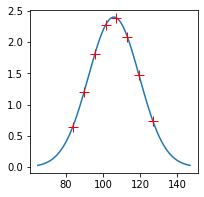

In [25]:
nbins=10000
x = np.linspace(105.85-13.63*3, 105.85+13.63*3, nbins) #linear set of x-values
y = Gaussian(x, 105.85, 13.63, 40667, 0)  #Gaussian set from Mila's fluorescence data
y_integral = (y/(nbins)*(-((105.85-13.63*3) - (105.85+13.63*3)))).mean() #the mean value of the curve (average intensity)
norm = y/y_integral/(nbins)*(-((105.85-13.63*3) - (105.85+13.63*3))) #Normalize the data 
x_test = np.array([x1, x2, x3, x4, x5, x6, x7, x8])
y_test = Gaussian(x_test, 105.85, 13.63, 40667, 0)
y_test_integral = (y_test/(nbins)*(-((105.85-13.63*3) - (105.85+13.63*3)))).mean()
norm_test = y_test/y_integral/(nbins)*(-((105.85-13.63*3) - (105.85+13.63*3)))
plt.plot(x,norm)
plt.plot(x_test,norm_test,   'r+', linewidth=0, markersize=10)
diameter = -((105.85-13.63*3) - (105.85+13.63*3))*.9*10**-6
area = np.pi * (diameter/2)**2
total_intensity = 10e-6/area
total_intensity

In [97]:
Ion_6_micromotion['y'].max()

104.40481132269336

In [28]:
intensity_test = total_intensity * norm_test #*(nbins)/(-((105.85-13.63*3) - (105.85+13.63*3)))
intensity = total_intensity * norm #/((nbins)/(-((105.85-13.63*3) - (105.85+13.63*3))))
print(intensity_test)
Isat = 222
S_parameters = intensity_test / Isat
S_parameters

[1494.41904816 2838.96818789 4270.80599606 5342.61483603 5616.96512524
 4904.78172898 3463.91015985 1750.25324444]


array([ 6.73161733, 12.78814499, 19.23786485, 24.06583259, 25.30164471,
       22.09361139, 15.60319892,  7.88402362])

In [29]:
intensity.mean()

2350.3410579998344

10.587121882882137

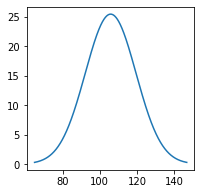

In [30]:
h = total_intensity * norm #*(nbins)/(-((105.85-13.63*3) - (105.85+13.63*3)))
s = h / Isat
plt.plot(x, s)

s.mean()#/((nbins)/(-((105.85-13.63*3) - (105.85+13.63*3))))

## TEST ZONE:

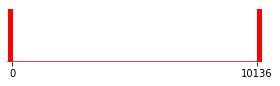

In [182]:
fig, ax = plt.subplots(ncols=1, figsize=(4, 1.3))
y = [0,0]
x = [-150, 10336]
ax.hist(x, 50, color = 'r')
ax.plot(x, y, 'r')
ax.set_xlim(-200, 10336)
#ax.axis('off')
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks((0,10136))
fig.tight_layout()
fig.savefig('Saved Figs/Trigger Separation.svg')


In [42]:
usedd = full_data_table['tt']
used = usedd.values.tolist()
used.sort()
tt_difference = []
for i in range(0,2287709):
    n=i+1
    d = used[int(n)]-used[int(i)]
    if 10000 < d < 40000:
        tt_difference.append(d)




Text(0, 0.5, 'Counts')

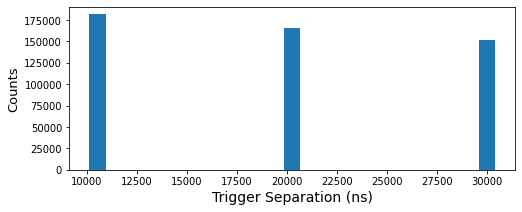

In [43]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 3))
ax.hist(tt_difference, bins=25)
#ax.set_xlim(10134,10138)
ax.set_xlabel('Trigger Separation (ns)', fontsize=14)
ax.set_ylabel('Counts', fontsize=13)

[[ 1.21632806e-05 -3.44833230e-09  5.81659007e-04  1.59891597e-05]
 [-3.44833230e-09  1.70525824e-05 -6.81879817e-01 -6.47041727e-01]
 [ 5.81659007e-04 -6.81879817e-01  3.62855570e+05 -6.05719815e+04]
 [ 1.59891597e-05 -6.47041727e-01 -6.05719815e+04  8.56773210e+04]]


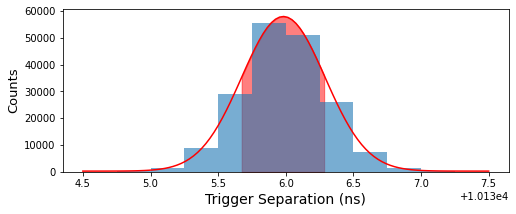

In [44]:
fig, ax0 = plt.subplots(ncols=1, figsize=(8, 3))
ax0.hist(tt_difference, bins=12, alpha=.6, range = (10134.5,10137.5))
ax0.set_xlabel('Trigger Separation (ns)',fontsize = 14)
ax0.set_ylabel('Counts',fontsize = 13)
#ax0.set_title(f'Trigger Precision')
        
hist_x, bins_x = np.histogram(tt_difference, 12, (10134.5,10137.5)) #, density=True),
bin_centres_x = (bins_x[:-1] + bins_x[1:])/2
xguess_mean = (10136)
xguess_sigma = 1
xguess_amp = hist_x.max()
xguess_c = hist_x.max()/10
xguess  = np.array([xguess_mean,xguess_sigma,xguess_amp,xguess_c])
popt_x, pcov_x = scipy.optimize.curve_fit(Gaussian, bin_centres_x, hist_x, p0=xguess, maxfev = 50000)
base = np.linspace(10134.5, 10137.5, 100)
hist_fit = Gaussian(base, *popt_x)
sigma_base = np.arange(popt_x[0]-popt_x[1], popt_x[0]+popt_x[1], .01)
sigma_fit = Gaussian(sigma_base, *popt_x)
ax0.plot(base, hist_fit, 'r')
ax0.fill_between(sigma_base, sigma_fit, alpha=.5, color='r')
perr = np.sqrt(np.diag(pcov_x))
print(pcov_x)
        

## MOTION:

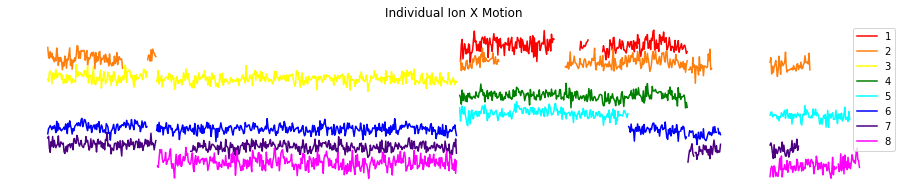

In [35]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(16, 3))

ion_1.plot_x_motion_stackable()
ion_2.plot_x_motion_stackable()
ion_3.plot_x_motion_stackable()
ion_4.plot_x_motion_stackable()
ion_5.plot_x_motion_stackable()
ion_6.plot_x_motion_stackable()
ion_7.plot_x_motion_stackable()
ion_8.plot_x_motion_stackable()
ax0.set_title("Individual Ion X Motion", fontsize = 12) # change the title
ax0.set_xlabel('Time/3 (ns)',fontsize = 12)
ax0.set_ylabel('X Displacement from center',fontsize = 12)
ax0.axis('off')
ax0.legend()

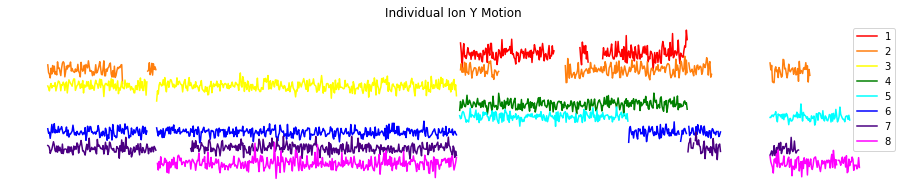

In [36]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(16, 3))
ion_1.plot_y_motion_stackable()
ion_2.plot_y_motion_stackable()
ion_3.plot_y_motion_stackable()
ion_4.plot_y_motion_stackable()
ion_5.plot_y_motion_stackable()
ion_6.plot_y_motion_stackable()
ion_7.plot_y_motion_stackable()
ion_8.plot_y_motion_stackable()
ax0.set_title("Individual Ion Y Motion", fontsize = 12) # change the title
ax0.set_xlabel('Time/3 (ns)',fontsize = 12)
ax0.set_ylabel('Y',fontsize = 12)
ax0.axis('off')
ax0.legend()

## MICROMOTION:

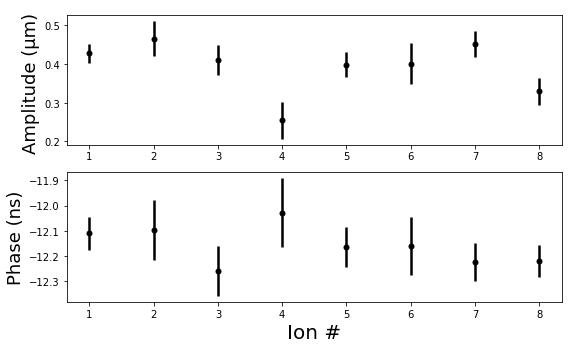

In [11]:
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(8, 5))
ion_1.micromotion_data()
ion_2.micromotion_data()
ion_3.micromotion_data()
ion_4.micromotion_data()
ion_5.micromotion_data()
ion_6.micromotion_data()
ion_7.micromotion_data()
ion_8.micromotion_data()
ax0.set_ylabel('Amplitude (\u03BCm) ', fontsize=18)
ax1.set_ylabel('Phase (ns)', fontsize=18)
ax1.set_xlabel('Ion #', fontsize=20)
#ax0.set_ylim(.2, .45)
#ax1.set_ylim(12.7, 13.3)
fig.tight_layout()
fig.savefig('Saved Figs/Fit Data.svg')

phase2 = 13.036167358080752, ycenter2 = 103.94422840713618, amp2=-0.46588603984334437, ampcov2=0.04543600591494937


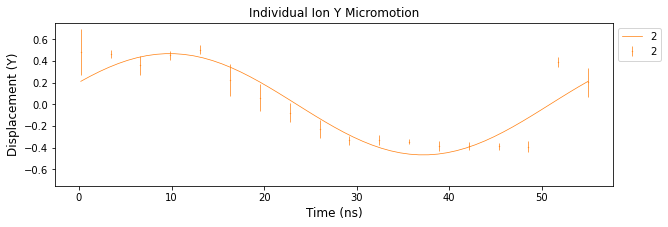

In [29]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ion_2.micromotion_fit_stackable(55)
ion_2.plot_y_micromotion_stackable()
ax0.set_title("Individual Ion Y Micromotion", fontsize = 12) # change the title
ax0.set_xlabel('Time (ns)',fontsize = 12)
ax0.set_ylabel('Displacement (Y)',fontsize = 12)
ax0.set_ylim(-.75,.75)
ax0.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.savefig('Saved Figs/Stacked Micromotion Fit.svg')

phase1 = 13.022815193417454, ycenter1 = 103.91994578916663, amp1=-0.4278429671736752, ampcov1=0.024174885967498193
phase2 = 13.036167358080752, ycenter2 = 103.94422840713618, amp2=-0.46588603984334437, ampcov2=0.04543600591494937
phase3 = 12.873572405129634, ycenter3 = 103.87373596151537, amp3=-0.41077363881415196, ampcov3=0.038069302547319765
phase4 = 13.104554554645448, ycenter4 = 103.69079992369542, amp4=-0.25472499919073077, ampcov4=0.047777177951098156
phase5 = 12.969712797144572, ycenter5 = 103.83239288263381, amp5=-0.3975728817979471, ampcov5=0.03244459182629256
phase6 = 12.971600442542615, ycenter6 = 103.8155770885833, amp6=-0.4010164083638072, ampcov6=0.052199899921605786
phase7 = 12.909717007400152, ycenter7 = 103.86155026090535, amp7=-0.45192737691053714, ampcov7=0.0346082432108546
phase8 = 12.913887751644197, ycenter8 = 103.67613333799515, amp8=-0.3294313841666103, ampcov8=0.03445230260072942


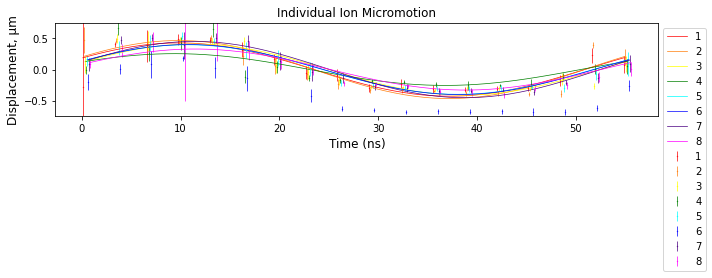

In [16]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ion_1.micromotion_fit_stackable(55)
ion_2.micromotion_fit_stackable(55)
ion_3.micromotion_fit_stackable(55)
ion_4.micromotion_fit_stackable(55)
ion_5.micromotion_fit_stackable(55)
ion_6.micromotion_fit_stackable(55)
ion_7.micromotion_fit_stackable(55)
ion_8.micromotion_fit_stackable(55)
ion_1.plot_y_micromotion_stackable()
ion_2.plot_y_micromotion_stackable()
ion_3.plot_y_micromotion_stackable()
ion_4.plot_y_micromotion_stackable()
ion_5.plot_y_micromotion_stackable()
ion_6.plot_y_micromotion_stackable()
ion_7.plot_y_micromotion_stackable()
ion_8.plot_y_micromotion_stackable()
ax0.set_title("Individual Ion Micromotion", fontsize = 12) # change the title
ax0.set_xlabel('Time (ns)',fontsize = 12)
ax0.set_ylabel('Displacement, \u03BCm',fontsize = 12)
ax0.set_ylim(-.75,.75)
ax0.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.tight_layout()
fig.savefig('Saved Figs/Stacked Micromotion Fit.svg')

phase1 = 13.022815193417454, ycenter1 = 103.91994578916663, amp1=-0.4278429671736752, ampcov1=0.024174885967498193
phase2 = 13.036167358080752, ycenter2 = 103.94422840713618, amp2=-0.46588603984334437, ampcov2=0.04543600591494937
phase3 = 12.873572405129634, ycenter3 = 103.87373596151537, amp3=-0.41077363881415196, ampcov3=0.038069302547319765
phase4 = 13.104554554645448, ycenter4 = 103.69079992369542, amp4=-0.25472499919073077, ampcov4=0.047777177951098156
phase5 = 12.969712797144572, ycenter5 = 103.83239288263381, amp5=-0.3975728817979471, ampcov5=0.03244459182629256
phase6 = 12.971600442542615, ycenter6 = 103.8155770885833, amp6=-0.4010164083638072, ampcov6=0.052199899921605786
phase7 = 12.909717007400152, ycenter7 = 103.86155026090535, amp7=-0.45192737691053714, ampcov7=0.0346082432108546
phase8 = 12.913887751644197, ycenter8 = 103.67613333799515, amp8=-0.3294313841666103, ampcov8=0.03445230260072942


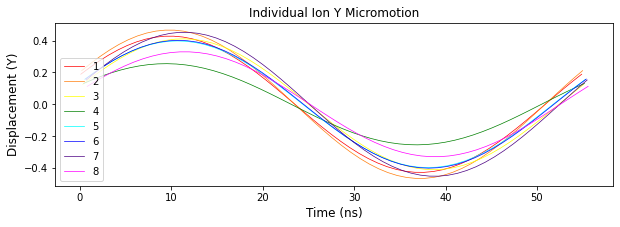

In [14]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ion_1.micromotion_fit_stackable(55)
ion_2.micromotion_fit_stackable(55)
ion_3.micromotion_fit_stackable(55)
ion_4.micromotion_fit_stackable(55)
ion_5.micromotion_fit_stackable(55)
ion_6.micromotion_fit_stackable(55)
ion_7.micromotion_fit_stackable(55)
ion_8.micromotion_fit_stackable(55)
ax0.set_title("Individual Ion Y Micromotion", fontsize = 12) # change the title
ax0.set_xlabel('Time (ns)',fontsize = 12)
ax0.set_ylabel('Displacement (Y)',fontsize = 12)
#ax0.set_ylim(-.75,.75)
ax0.legend()

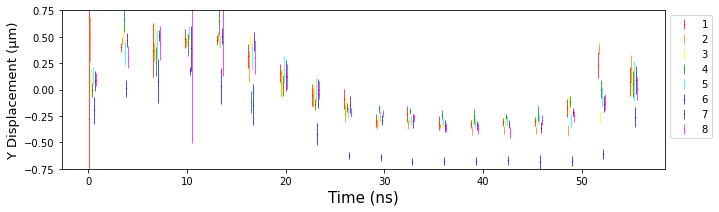

In [12]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ion_1.plot_y_micromotion_stackable()
ion_2.plot_y_micromotion_stackable()
ion_3.plot_y_micromotion_stackable()
ion_4.plot_y_micromotion_stackable()
ion_5.plot_y_micromotion_stackable()
ion_6.plot_y_micromotion_stackable()
ion_7.plot_y_micromotion_stackable()
ion_8.plot_y_micromotion_stackable()
ax0.set_ylabel('Y Displacement (\u03BCm)', fontsize=13)
ax0.set_xlabel('Time (ns)', fontsize=15)
ax0.set_ylim(-.75, .75)
ax0.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.tight_layout()
fig.savefig('Saved Figs/Stacked Micromotion.svg')

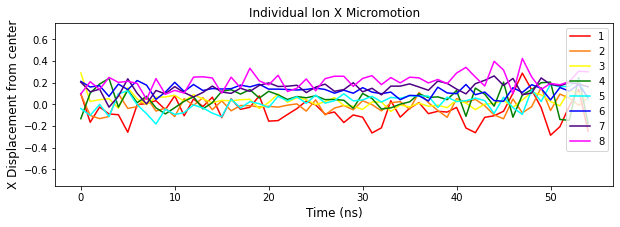

In [26]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))

ion_1.plot_x_micromotion_stackable()
ion_2.plot_x_micromotion_stackable()
ion_3.plot_x_micromotion_stackable()
ion_4.plot_x_micromotion_stackable()
ion_5.plot_x_micromotion_stackable()
ion_6.plot_x_micromotion_stackable()
ion_7.plot_x_micromotion_stackable()
ion_8.plot_x_micromotion_stackable()
ax0.set_title("Individual Ion X Micromotion", fontsize = 12) # change the title
ax0.set_xlabel('Time (ns)',fontsize = 12)
ax0.set_ylabel('X Displacement from center',fontsize = 12)
ax0.set_ylim(-.75, .75)
ax0.legend()

## FLORESENCE:

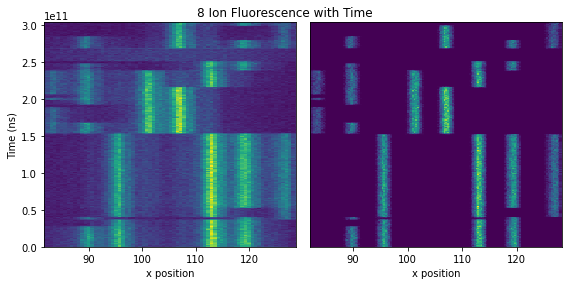

In [41]:
used_data = (data_table
             #.query("2.685e11 < time < 2.705e11")
            )
old_data = (old_data_table
             #.query("2.685e11 < time < 2.705e11")
            )
    
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8,4))
fig.suptitle('8 Ion Fluorescence with Time')
h = ax0.hist2d(old_data['xc'], old_data['time'], bins = [400, 200])
ax0.set_xlim(x1-2,x8+2)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')
#plt.ylim(.25*10**11, .5*10**11)
#ax0.colorbar(h[3])
h = ax1.hist2d(used_data['xc'], used_data['time'], bins = [150, 200])
ax1.set_xlim(x1-1.5,x8+1.5)
ax1.set_xlabel('x position')
ax1.set_ylabel('Time (ns)')
ax1.yaxis.set_visible(False)
fig.tight_layout()

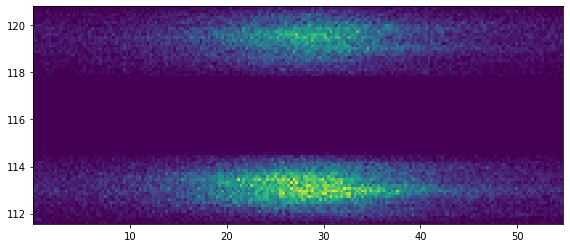

In [42]:
used_data = (data_table
             .query("110 < x < 121")
            )
    
fig, ax = plt.subplots(ncols=1, figsize=(9.5,4))
h = ax.hist2d(used_data['tfold'], used_data['xc'], bins = [200, 75])



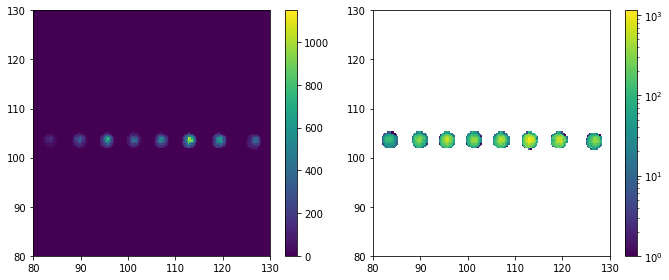

In [121]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))
h = ax0.hist2d(data_table['xc'], data_table['yc'], bins = 200, range = [(80, 130), (80, 130)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data_table['xc'], data_table['yc'], bins = 200, range = [(80, 130), (80, 130)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

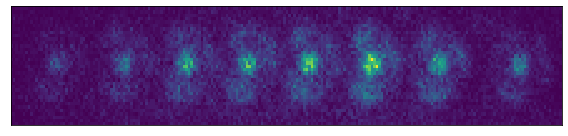

In [17]:
nbins = 50
used = old_data_table.query("1.43e11 < time < 1.63e11")
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 2))
h = ax0.hist2d(used['xc'], used['yc'], bins = (220,35), range = [(79, 131), (99, 108)])
#fig.colorbar(h[3], ax = ax0)
#ax0.set_title("Integrated Ion Fluorescence", fontsize=15)
ax0.set_xlabel("x (pixels)", fontsize=18)
#ax0.xaxis.set_visible(False)
ax0.set_ylabel("y (pixels)", fontsize=18)
used = used.query(f"{y1}-1.5 < yc < {y6}+1.5")
#h = ax1.hist(used['xc'], bins = 300, color='r', range = (79, 131))
#ax0.set_title("Integrated Ion Fluorescence", fontsize=15)
#ax1.set_xlabel("x-pixels", fontsize=14)
#ax1.set_ylabel("counts", fontsize=14)
#ax1.set_xlim(79,131)
x = [128.99, 130]
y = [100, 100]
#ax0.plot(x,y, 'r', label='1 \u03BCm')
#ax0.scatter(x,y, color='r', marker='|')
#ax0.legend(bbox_to_anchor=(1.0, .3), loc='upper left', handlelength=.11)
ax0.xaxis.set_visible(False)
ax0.yaxis.set_visible(False)
fig.tight_layout()
fig.savefig('Saved Figs/Integrated Ion Fluorescence.svg')

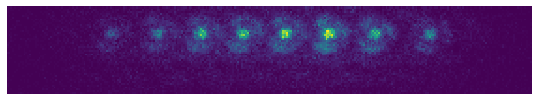

In [15]:
fig, ax0 = plt.subplots(ncols=1, figsize=(8, 2))
h = ax0.hist2d(used['xc'], used['yc'], bins = (280,45), range = [(69, 141), (94, 108)])
#ax0.set_title("Integrated Ion Fluorescence", fontsize=15)
ax0.set_xlabel("x-pixels", fontsize=14)
#ax0.set_xlim(79,131)
fig.tight_layout()
ax0.axis('off')
fig.savefig('Saved Figs/Powerpoint Pic.svg')

Text(0, 0.5, 'counts')

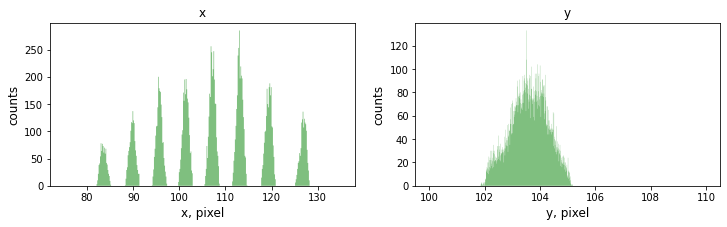

In [63]:
used = data_table.query("1.43e11 < time < 1.63e11")
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 3))

ax0.hist(used['xc'], bins = 400, range = (75, 135), color = 'g', alpha=0.5, histtype = 'stepfilled')
ax0.set_title("x", fontsize = 12) # change the title
ax0.set_xlabel('x, pixel',fontsize = 12)
ax0.set_ylabel('counts',fontsize = 12)

ax1.hist(used['yc'], bins = 1000, range = (100, 110), color = 'g', alpha=0.5, histtype = 'stepfilled')
ax1.set_title("y", fontsize = 12) # change the title
ax1.set_xlabel('y, pixel',fontsize = 12)
ax1.set_ylabel('counts',fontsize = 12)


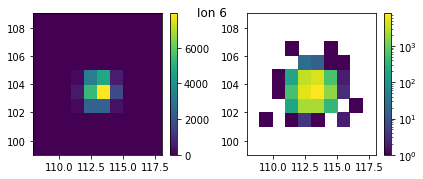

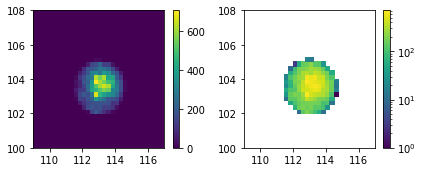

In [38]:
ion_6.show_ion()
ion_6.show_ion_centroided()

## FOLDED TIME:

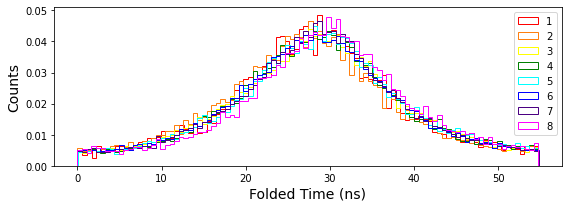

In [84]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(8, 3))
ion_1.tfold_histogram_stackable()
ion_2.tfold_histogram_stackable()
ion_3.tfold_histogram_stackable()
ion_4.tfold_histogram_stackable()
ion_5.tfold_histogram_stackable()
ion_6.tfold_histogram_stackable()
ion_7.tfold_histogram_stackable()
ion_8.tfold_histogram_stackable()
#ax0.set_title("Individual Ion Folded Time", fontsize = 15) # change the title
ax0.set_xlabel('Folded Time (ns)',fontsize = 14)
ax0.set_ylabel('Counts',fontsize = 14)
ax0.legend()
fig.tight_layout()
fig.savefig('Saved Figs/Tfold Stacked.svg')

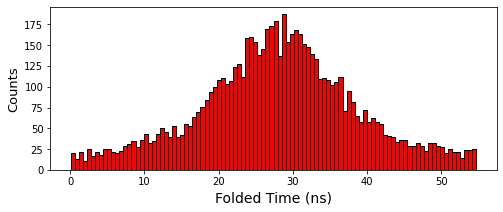

In [65]:
fig, ax = plt.subplots(ncols=1, figsize=(8,3))
ax.hist(Ion_1['tfold'], bins=100, color='r', ec='k')
#ax.set_title('Folded Time Distribution')
ax.set_xlabel('Folded Time (ns)', fontsize=14)
ax.set_ylabel('Counts', fontsize=13)
fig.savefig('Saved Figs/Folded Time Histogram.svg')

## FLUX:

average pixels/hit = 5.6457440867842 <TOT> =  5.6457440867842
Tue Jun 23 10:53:26 2020


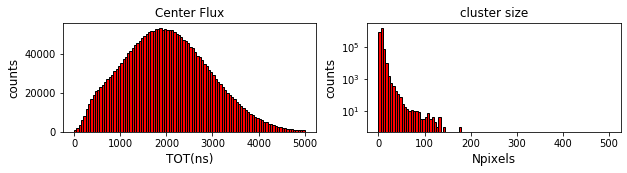

In [108]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 2))

ax0.hist(data_table['center flux'], bins = 100, range = (0, 5000), color = 'r', ec = 'k')
ax0.set_title("Center Flux", fontsize = 12) # change the title
ax0.set_xlabel('TOT(ns)',fontsize = 12)
ax0.set_ylabel('counts',fontsize = 12)
#plt.xlim(0, 240)
ax1.set_yscale('log')
#plt.ylim(0, 10000)
#plt.show()

ax1.hist(data_table['cluster size'], bins = 100, range = (0, 500), color = 'r', ec = 'k')
ax1.set_title("cluster size", fontsize = 12) # change the title
ax1.set_xlabel('Npixels',fontsize = 12)
ax1.set_ylabel('counts',fontsize = 12)
#plt.ylim(0.1, 1E5)
#plt.yscale('log')
#plt.ylim(0, 10000)


print ('average pixels/hit =', np.average(data_table['cluster size']), '<TOT> = ', np.average(data_table['cluster size']))
print (time.ctime())


/home/maverickmillican/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/maverickmillican/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/maverickmillican/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


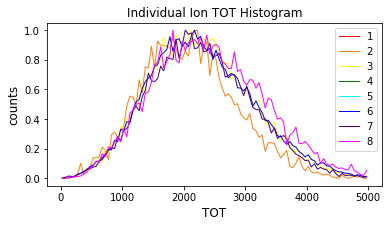

In [41]:
fig, (ax0) = plt.subplots(ncols=1, nrows=1, figsize=(6, 3))
ion_1.flux_histogram_stackable()
ion_2.flux_histogram_stackable()
ion_3.flux_histogram_stackable()
ion_4.flux_histogram_stackable()
ion_5.flux_histogram_stackable()
ion_6.flux_histogram_stackable()
ion_7.flux_histogram_stackable()
ion_8.flux_histogram_stackable()
ax0.set_title("Individual Ion TOT Histogram", fontsize = 12) # change the title
ax0.set_xlabel('TOT',fontsize = 12)
ax0.set_ylabel('counts',fontsize = 12)
ax0.legend()

## POSITION IN FOLDED TIME:

-0.009652496064524549
107.11683232601636


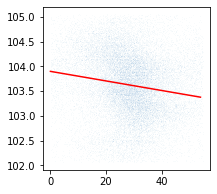

In [16]:
m=-1
b=130


popty, pcovy = scipy.optimize.curve_fit(Linear, Ion_5['tfold'], Ion_5['yc'], [m, b])
fitbase = np.linspace(0,54,100)
lin_fity = Linear(fitbase, *popty)

b=104
poptx, pcovx = scipy.optimize.curve_fit(Linear, Ion_5['tfold'], Ion_5['xc'], [m, b])
fitbase = np.linspace(0,54,100)
lin_fitx = Linear(fitbase, *poptx)

plt.scatter(Ion_5['tfold'], Ion_5['yc'], s=.0001)
plt.plot(fitbase, lin_fity, 'r')
print(popty[0])
print(poptx[1])

In [313]:
ion_1.plot_tfold_position_y()
ion_2.plot_tfold_position_y()
ion_3.plot_tfold_position_y()
ion_4.plot_tfold_position_y()
ion_5.plot_tfold_position_y()
ion_6.plot_tfold_position_y()
ion_7.plot_tfold_position_y()
ion_8.plot_tfold_position_y()

AttributeError: 'Ion' object has no attribute 'plot_tfold_position_y'

0.16017145451409942
[[1.77053943e-05 6.27115546e-06 7.42929454e-05]
 [6.27115546e-06 2.65591007e-05 1.32146630e-05]
 [7.42929454e-05 1.32146630e-05 9.32999451e-04]]


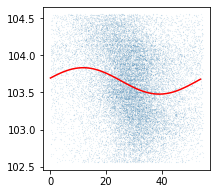

In [13]:
A=104
B=1
period=54
phase=0
fitbase = np.linspace(0,54,100)
used = Ion_5.query("103.55650885357784-1 < yc < 103.55650885357784+1")

popt, pcov = scipy.optimize.curve_fit(Oscillation, used['tfold'], used['yc'], [A, B, phase])
sin_fit = Oscillation(fitbase, *popt)
plt.scatter(used['tfold'], used['yc'], s=.001)
plt.plot(fitbase, sin_fit, 'r')
print(popt[1]*.9)
print(pcov)

In [19]:
data_table['time'].max()

303716491860.901

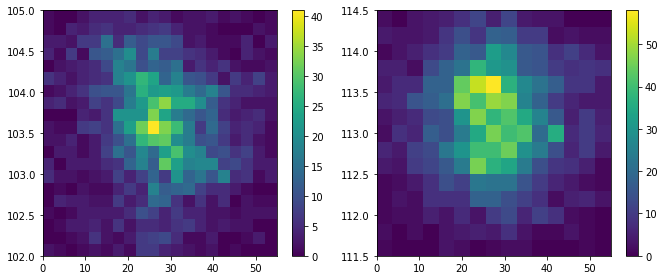

In [184]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))
use = Ion_6.query('0 < time < 10000000000')

h = ax0.hist2d(use['tfold'], use['yc'], bins = 20, range = [(0, 55), (102, 105)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(use['tfold'], use['xc'], bins = 15, range = [(0, 55), (111.5, 114.5)])
fig.colorbar(h[3], ax = ax1)
#ax0.plot(fitbase, lin_fitx, 'r')
fig.tight_layout()
plt.show()

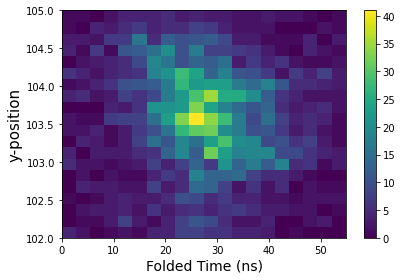

In [83]:
fig, ax0 = plt.subplots(ncols=1, figsize=(6, 4))
use = Ion_6.query('0 < time < 10000000000')

h = ax0.hist2d(use['tfold'], use['yc'], bins = 20, range = [(0, 55), (102, 105)])
ax0.set_xlabel('Folded Time (ns)', fontsize=14)
ax0.set_ylabel('y-position', fontsize=15)
fig.colorbar(h[3], ax = ax0)
fig.tight_layout()
fig.savefig('Saved Figs/ToF.svg')

## PHASE AND PERIOD OVER TIME:

shift 6  = 1.7678  +- 0.0366 ns


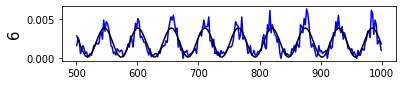

In [55]:
start=500
stop=start+500
#ion_1.plot_tof_fit(start,stop)
#ion_2.plot_tof_fit(start,stop)
#ion_3.plot_tof_fit(start,stop)
#ion_4.plot_tof_fit(start,stop)
#ion_5.plot_tof_fit(start,stop)
ion_6.plot_tof_fit(start,stop)
#ion_7.plot_tof_fit(start,stop)
#ion_8.plot_tof_fit(start,stop)

shift 1  = 7.9856  +- 0.0830 ns
shift 2  = 1.9748  +- 0.0546 ns
shift 3  = 1.7990  +- 0.0473 ns
shift 4  = 1.8181  +- 0.0530 ns
shift 5  = 1.7420  +- 0.0508 ns
shift 6  = 1.7308  +- 0.0377 ns
shift 7  = 1.7405  +- 0.0426 ns
shift 8  = 7.8257  +- 0.0521 ns


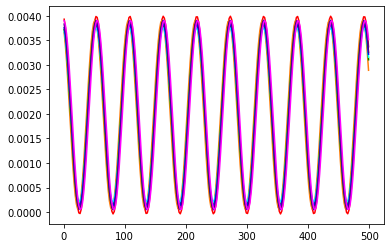

In [53]:
start=0
stop=start+500
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ion_1.plot_tof_fit_stackable(start,stop)
ion_2.plot_tof_fit_stackable(start,stop)
ion_3.plot_tof_fit_stackable(start,stop)
ion_4.plot_tof_fit_stackable(start,stop)
ion_5.plot_tof_fit_stackable(start,stop)
ion_6.plot_tof_fit_stackable(start,stop)
ion_7.plot_tof_fit_stackable(start,stop)
ion_8.plot_tof_fit_stackable(start,stop)

(0.0, 35.0)

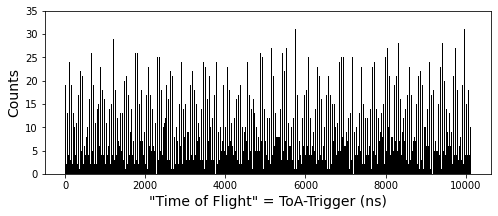

In [80]:
fig, ax = plt.subplots(ncols=1, figsize=(8,3))
ax.hist(Ion_6['tof'], bins=5000, color='k')
ax.set_xlabel('"Time of Flight" = ToA-Trigger (ns)', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_ylim(0,35)

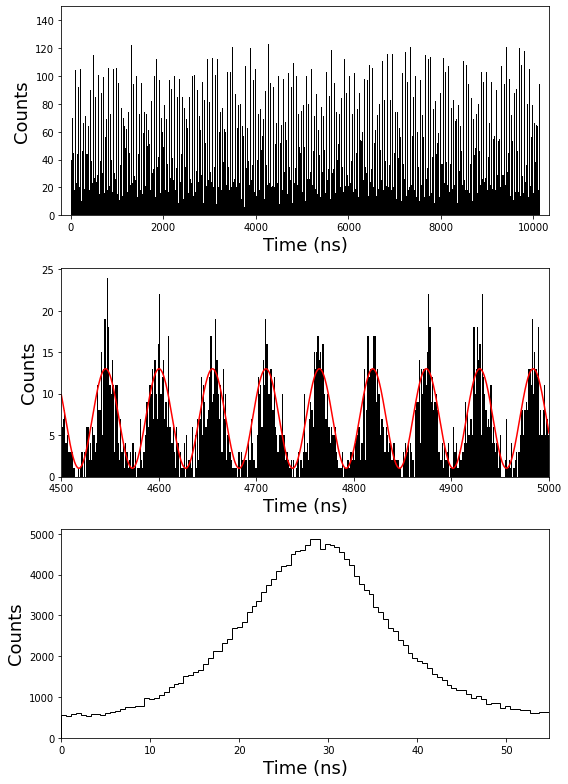

In [49]:
used = Ion_6.query('4500 < tof < 5000')
fig, (ax2, ax, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(8,11), gridspec_kw={'height_ratios': [1,1,1]})
ax.hist(used['tof'], bins=400, color='k',)
#ax.set_title('Time of Flight (Ion 6)', fontsize=16)
#ax.set_ylim(0,.009)
ax.set_xlabel('Time (ns)', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
#ion_6.plot_tof_fit_stackable(4500,5000)
x = np.linspace(4500,5000, 1000)
y = Oscillation(x, 7,6,8.1)
ax.plot(x,y, 'r')
ax2.hist(Ion_6['tof'], bins=1000, color='k')
ax.set_xlim(4500,5000)
#ax1.set_xlabel('"Time of Flight" = ToA-Trigger (ns)', fontsize=14)
y = [0,100,100,0,0,100,100,0]
x = [-100, -100,0,0,10136,10136, 10236,10236]
#ax2.plot(x, y, 'b', lw=3)
ax2.set_xlim(-200, 10336)
#ax.axis('off')
#ax2.spines["bottom"].set_visible(False)
#ax2.spines["top"].set_visible(False)
#ax2.spines["right"].set_visible(False)
#ax2.spines["left"].set_visible(False)
#ax2.yaxis.set_visible(False)
#ax2.set_xticks((0,10136))
ax2.set_xlabel('Time (ns)', fontsize = 18)
ax2.set_ylabel('Counts', fontsize = 18)
ax2.set_ylim(0,150)
ax3.hist(data_table['tfold'], bins=100, color='k', histtype='step')
#ax.set_title('Folded Time Distribution')
ax3.set_xlabel('Time (ns)', fontsize=18)
ax3.set_ylabel('Counts', fontsize=18)
ax3.set_xlim(0,54.79)
fig.tight_layout()
fig.savefig('Saved Figs/ToF Fit.svg')

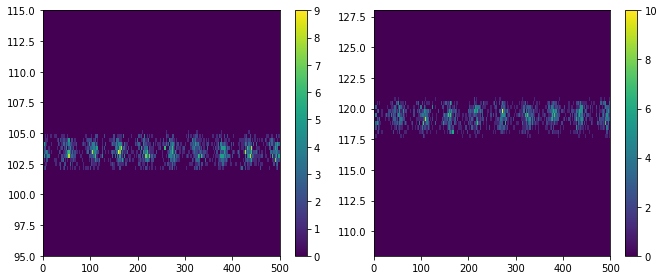

In [25]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(Ion_7['tof'], Ion_7['yc'], bins = (200,60), range = [(0, 500), (95, 115)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(Ion_7['tof'], Ion_7['xc'], bins = (200,60), range = [(0, 500), (108, 128)])
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


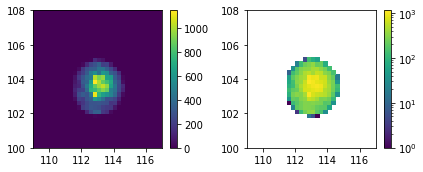

In [32]:
ion_6.show_ion_centroided()